In [2]:
import mytry
import matplotlib.pyplot as plt
import os
from utils import evaluate as my_eval
from utils import model_MLP as my_MLP

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA

In [13]:
EPOCH = 1000
TARGET_CATEGORY = '노래방'

filepath = "./data/seoul_preprocessed2_y_nextquarter.csv"
savepath = os.path.join('./log', TARGET_CATEGORY)

In [18]:
filepath = "./data/seoul_preprocessed2_y_nextquarter.csv"

# Raw
x_train, y_train, x_test, y_test, scaler_raw = mytry.get_traintest(
    filepath=filepath,
    pred_category=TARGET_CATEGORY, 
    y_next_quarter=True, 
    random_split=True, 
    norm=None, 
    pca=False
)

# MinMMax
scaler_minmax = MinMaxScaler()
x_train_minmax, x_test_minmax = mytry.__get_normed(x_train, x_test, scaler_minmax)
y_train_minmax, y_test_minmax = mytry.__get_normed(y_train, y_test, scaler_minmax)

# Standard
scaler_std = StandardScaler()
x_train_std, x_test_std = mytry.__get_normed(x_train, x_test, scaler_std)
y_train_std, y_test_std = mytry.__get_normed(y_train, y_test, scaler_std)

# PCA
scaler_pca = StandardScaler()
pca = PCA()
x_train_pca, x_test_pca = mytry.__get_normed(x_train, x_test, scaler_pca)
y_train_pca, y_test_pca = mytry.__get_normed(y_train, y_test, scaler_pca)
x_train_pca, x_test_pca = mytry.___get_PCA(x_train_pca, x_test_pca, pca)

[train] 2017_1 : (867, 30), accumulate : (867, 30)
[train] 2017_2 : (867, 30), accumulate : (1734, 30)
[train] 2017_3 : (867, 30), accumulate : (2601, 30)
[train] 2017_4 : (867, 30), accumulate : (3468, 30)
[train] 2018_1 : (867, 30), accumulate : (4335, 30)
[train] 2018_2 : (867, 30), accumulate : (5202, 30)
[train] 2018_3 : (867, 30), accumulate : (6069, 30)
[test] 2019_1 : (867, 30), accumulate : (867, 30)
[test] 2019_2 : (867, 30), accumulate : (1734, 30)
[test] 2019_3 : (867, 30), accumulate : (2601, 30)
[test] 2018_4 : (867, 30), accumulate : (3468, 30)
x_header ['남성연령대_10_유동인_수', '남성연령대_20_유동인_수', '남성연령대_30_유동인_수', '남성연령대_40_유동인_수', '남성연령대_50_유동인_수', '남성연령대_60_유동인_수', '여성연령대_10_유동인_수', '여성연령대_20_유동인_수', '여성연령대_30_유동인_수', '여성연령대_40_유동인_수', '여성연령대_50_유동인_수', '여성연령대_60_유동인_수'] y_header ['다음분기_매출_금액']
random split
pca ratios [0.79 0.11 0.07 0.01 0.01 0.   0.   0.   0.   0.   0.   0.  ]
pca ratios [0.79 0.11 0.07 0.01 0.01 0.   0.   0.   0.   0.   0.   0.  ]
pca top-3


In [19]:
dataset_raw =    [x_train, y_train, x_test, y_test]
dataset_minmax = [x_train_minmax, y_train_minmax, x_test_minmax, y_test_minmax]
dataset_std =    [x_train_std, y_train_std, x_test_std, y_test_std]
dataset_pca =    [x_train_pca, y_train_pca, x_test_pca, y_test_pca]

# Model training

## LGBM

In [20]:
model_LGBM_raw = mytry.main(
    modelname='LGBM_raw',
    dataset_name = TARGET_CATEGORY,
    datasets = dataset_raw,
    scaler = scaler_raw
)

------- evaluate LGBM with raw -------
RMSE : 142658815.618593
R2 : 0.609288
----------------------------
[857543.86971575] 2862
평균 오차 300%
최대 오차 75230%
최소 오차 0%


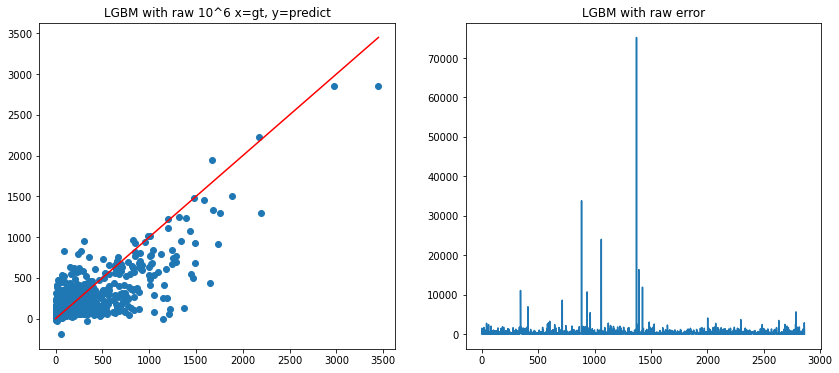

In [21]:
errs_LGBM_raw = my_eval.eval_regression(y_test, model_LGBM_raw.predict(x_test), scaler=scaler_raw, model_name='LGBM with raw', savepath=savepath)

In [22]:
model_LGBM_minmax = mytry.main(
    modelname='LGBM_minmax',
    dataset_name = TARGET_CATEGORY,
    datasets = dataset_minmax,
    scaler = scaler_minmax
)

In [23]:
model_LGBM_std = mytry.main(
    modelname='LGBM_std',
    dataset_name = TARGET_CATEGORY,
    datasets = dataset_std,
    scaler = scaler_std
)

In [24]:
model_LGBM_pca = mytry.main(
    modelname='LGBM_pca',
    dataset_name = TARGET_CATEGORY,
    datasets = dataset_pca,
    scaler = scaler_pca
)

## 4-MLP [12, 6, 1]

In [25]:
model_4MLP_raw, hist_4MLP_raw = mytry.main(
    modelname='4-MLP_raw',
    dataset_name = TARGET_CATEGORY,
    datasets = dataset_raw,
    scaler = scaler_raw,
    n_hidden=2,
    epoch=EPOCH
)

...................../log/노래방/4-MLP_raw-epoch:0999-val_mse:36210044638855168.0000.hdf5 saved


In [26]:
model_4MLP_minmax, hist_4MLP_minmax = mytry.main(
    modelname='4-MLP_minmax',
    dataset_name = TARGET_CATEGORY,
    datasets = dataset_minmax,
    scaler = scaler_minmax,
    n_hidden=2,
    epoch=EPOCH
)

.
Epoch 00028: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.

Epoch 00038: ReduceLROnPlateau reducing learning rate to 3.999999898951501e-06.

Epoch 00048: ReduceLROnPlateau reducing learning rate to 1e-06.
..................../log/노래방/4-MLP_minmax-epoch:0999-val_mse:0.0021.hdf5 saved


In [27]:
model_4MLP_std, hist_4MLP_std = mytry.main(
    modelname='4-MLP_std',
    dataset_name = TARGET_CATEGORY,
    datasets = dataset_std,
    scaler = scaler_std,
    n_hidden=2,
    epoch=EPOCH
)

............
Epoch 00582: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.

Epoch 00598: ReduceLROnPlateau reducing learning rate to 3.999999898951501e-06.
.
Epoch 00608: ReduceLROnPlateau reducing learning rate to 1e-06.
./log/노래방/4-MLP_std-epoch:0640-val_mse:0.4634.hdf5 saved


In [28]:
model_4MLP_pca, hist_4MLP_pca = mytry.main(
    modelname='4-MLP_pca',
    dataset_name = TARGET_CATEGORY,
    datasets = dataset_pca,
    scaler = scaler_pca,
    n_hidden=2,
    epoch=EPOCH
)

.......
Epoch 00307: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.

Epoch 00317: ReduceLROnPlateau reducing learning rate to 3.999999898951501e-06.

Epoch 00327: ReduceLROnPlateau reducing learning rate to 1e-06.
./log/노래방/4-MLP_pca-epoch:0346-val_mse:0.5779.hdf5 saved


## 5-MLP [24, 12, 6, 1]

In [29]:
model_5MLP_raw, hist_5MLP_raw = mytry.main(
    modelname='5-MLP_raw',
    dataset_name = TARGET_CATEGORY,
    datasets = dataset_raw,
    scaler = scaler_raw,
    n_hidden=3,
    epoch = EPOCH
)

...................../log/노래방/5-MLP_raw-epoch:0999-val_mse:34212047327592448.0000.hdf5 saved


In [30]:
model_5MLP_minmax, hist_5MLP_minmax = mytry.main(
    modelname='5-MLP_minmax',
    dataset_name = TARGET_CATEGORY,
    datasets = dataset_minmax,
    scaler = scaler_minmax,
    n_hidden=3,
    epoch = EPOCH
)

.
Epoch 00024: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.

Epoch 00034: ReduceLROnPlateau reducing learning rate to 3.999999898951501e-06.

Epoch 00044: ReduceLROnPlateau reducing learning rate to 1e-06.
..................../log/노래방/5-MLP_minmax-epoch:0999-val_mse:0.0020.hdf5 saved


In [31]:
model_5MLP_std, hist_5MLP_std = mytry.main(
    modelname='5-MLP_std',
    dataset_name = TARGET_CATEGORY,
    datasets = dataset_std,
    scaler = scaler_std,
    n_hidden=3,
    epoch = EPOCH
)

......
Epoch 00290: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.
.
Epoch 00306: ReduceLROnPlateau reducing learning rate to 3.999999898951501e-06.

Epoch 00316: ReduceLROnPlateau reducing learning rate to 1e-06.
../log/노래방/5-MLP_std-epoch:0352-val_mse:0.4336.hdf5 saved


In [32]:
model_5MLP_pca, hist_5MLP_pca = mytry.main(
    modelname='5-MLP_pca',
    dataset_name = TARGET_CATEGORY,
    datasets = dataset_pca,
    scaler = scaler_pca,
    n_hidden=3,
    epoch = EPOCH
)

...
Epoch 00148: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.
.
Epoch 00158: ReduceLROnPlateau reducing learning rate to 3.999999898951501e-06.

Epoch 00168: ReduceLROnPlateau reducing learning rate to 1e-06.
./log/노래방/5-MLP_pca-epoch:0187-val_mse:0.5773.hdf5 saved


# Evaluate

## LGBM

------- evaluate LGBM with raw -------
RMSE : 142658815.618593
R2 : 0.609288
----------------------------
[857543.86971575] 2862
평균 오차 300%
최대 오차 75230%
최소 오차 0%


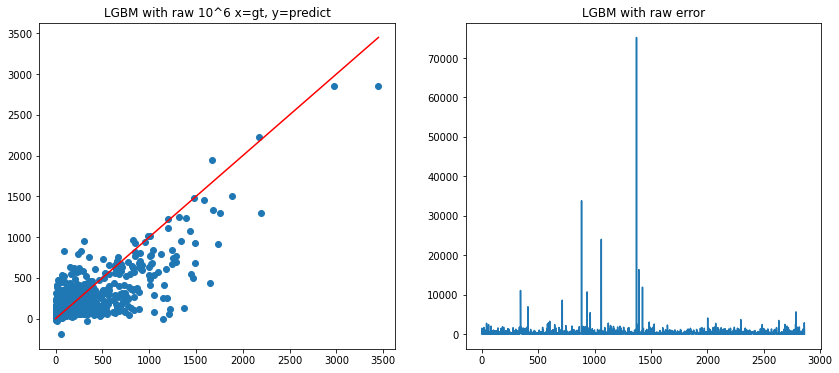

In [33]:
errs_LGBM_raw = my_eval.eval_regression(y_test, model_LGBM_raw.predict(x_test), scaler=scaler_raw, 
                                        model_name='LGBM with raw', savepath=savepath)

------- evaluate LGBM with minmax norm -------
RMSE : 142676504.015897
R2 : 0.609191
----------------------------
[885979.55340329] 2862
평균 오차 310%
최대 오차 88125%
최소 오차 0%


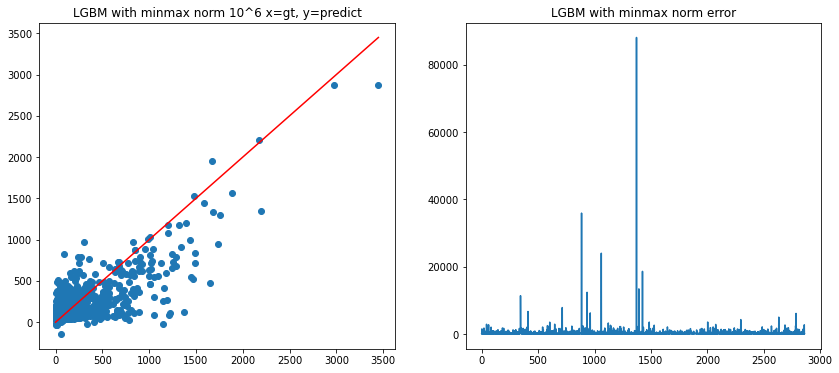

In [34]:
errs_LGBM_minmax = my_eval.eval_regression(y_test_minmax, model_LGBM_minmax.predict(x_test_minmax), scaler=scaler_minmax, 
                                           model_name='LGBM with minmax norm', savepath=savepath)

------- evaluate LGBM with std norm -------
RMSE : 145816310.733275
R2 : 0.591801
----------------------------
[864025.02636064] 2862
평균 오차 302%
최대 오차 77509%
최소 오차 0%


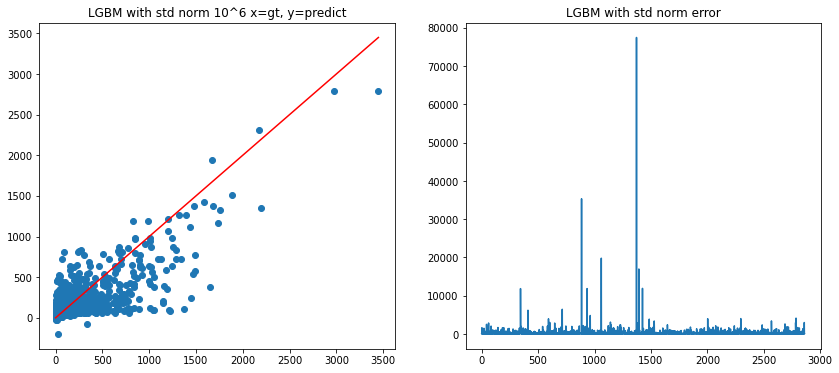

In [35]:
errs_LGBM_std = my_eval.eval_regression(y_test_std, model_LGBM_std.predict(x_test_std), scaler=scaler_std, 
                                        model_name='LGBM with std norm', savepath=savepath)

------- evaluate LGBM with PCA -------
RMSE : 168426958.433238
R2 : 0.455393
----------------------------
[924354.66550558] 2862
평균 오차 323%
최대 오차 59926%
최소 오차 0%


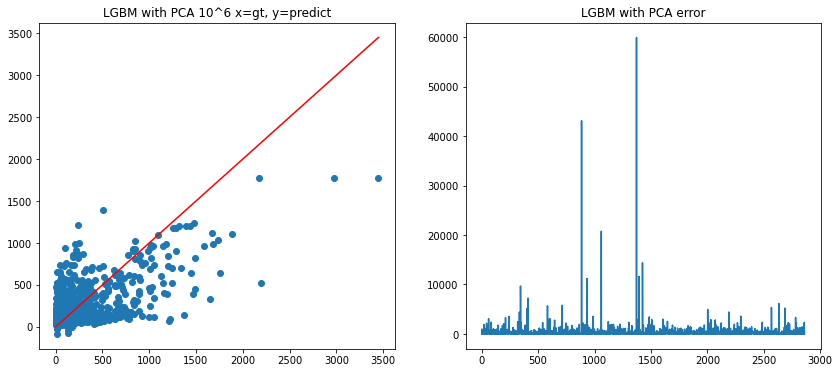

In [36]:
errs_LGBM_pca = my_eval.eval_regression(y_test_pca, model_LGBM_pca.predict(x_test_pca), scaler=scaler_pca, 
                                        model_name='LGBM with PCA', savepath=savepath)

## 4-MLP

------- evaluate 4-MLP with raw -------
RMSE : 190289376.169273
R2 : 0.304833
----------------------------
[705902.10796705] 2862
평균 오차 247%
최대 오차 66436%
최소 오차 0%


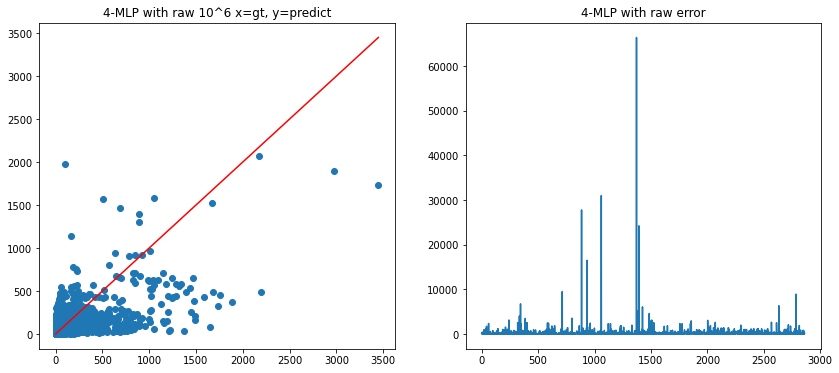

In [37]:
errs_4MLP_raw = my_eval.eval_regression(y_test, model_4MLP_raw.predict(x_test), scaler=scaler_raw, 
                                        model_name='4-MLP with raw', savepath=savepath)

------- evaluate 4-MLP with minmax norm -------
RMSE : 175989591.098617
R2 : 0.405388
----------------------------
[996151.01313139] 2862
평균 오차 348%
최대 오차 73526%
최소 오차 0%


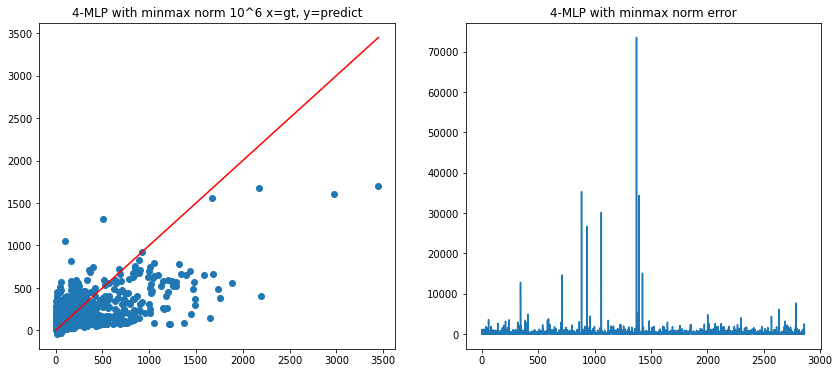

In [38]:
errs_4MLP_minmax = my_eval.eval_regression(y_test_minmax, model_4MLP_minmax.predict(x_test_minmax), scaler=scaler_minmax, 
                                           model_name='4-MLP with minmax norm', savepath=savepath)

------- evaluate 4-MLP with std -------
RMSE : 157992010.238356
R2 : 0.520785
----------------------------
[907764.64088908] 2862
평균 오차 317%
최대 오차 68471%
최소 오차 0%


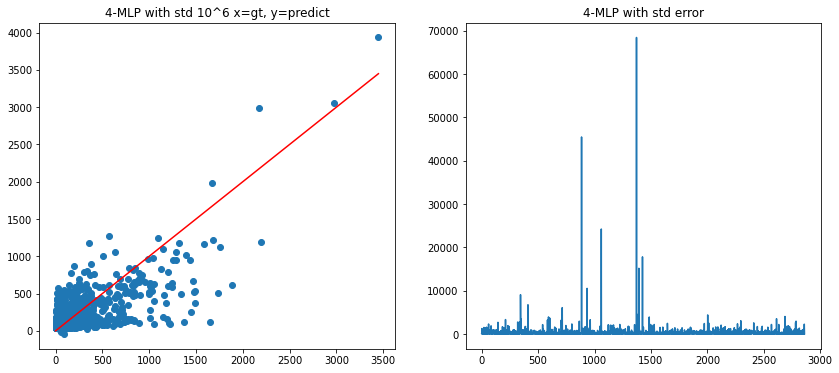

In [39]:
errs_4MLP_std = my_eval.eval_regression(y_test_std, model_4MLP_std.predict(x_test_std), scaler=scaler_std, 
                                        model_name='4-MLP with std', savepath=savepath)

------- evaluate 4-MLP with PCA -------
RMSE : 176453264.213816
R2 : 0.402251
----------------------------
[984391.40633751] 2862
평균 오차 344%
최대 오차 84433%
최소 오차 0%


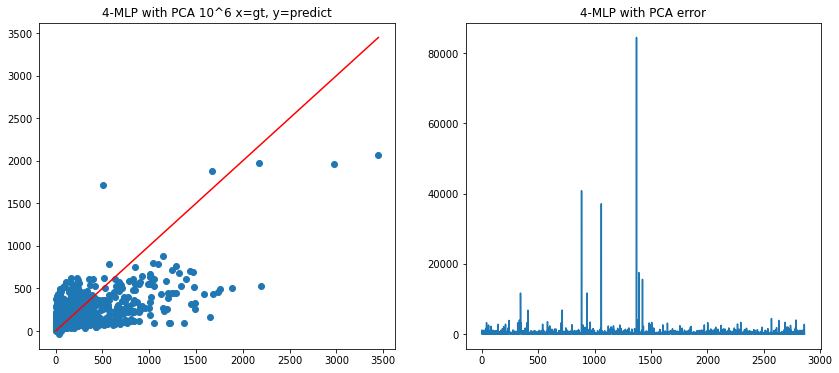

In [40]:
errs_4MLP_pca = my_eval.eval_regression(y_test_pca, model_4MLP_pca.predict(x_test_pca), scaler=scaler_pca, 
                                        model_name='4-MLP with PCA', savepath=savepath)

# 5-MLP

------- evaluate 5-MLP with raw -------
RMSE : 184964978.802343
R2 : 0.343191
----------------------------
[690161.28488376] 2862
평균 오차 241%
최대 오차 56069%
최소 오차 0%


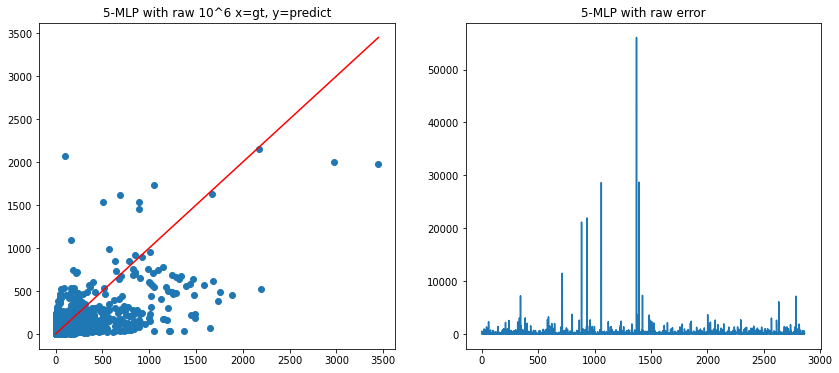

In [41]:
errs_5MLP_raw = my_eval.eval_regression(y_test, model_5MLP_raw.predict(x_test), scaler=scaler_raw, 
                                        model_name='5-MLP with raw', savepath=savepath)

------- evaluate 5-MLP with minmax norm -------
RMSE : 171861347.019635
R2 : 0.432957
----------------------------
[936441.42212645] 2862
평균 오차 327%
최대 오차 53837%
최소 오차 0%


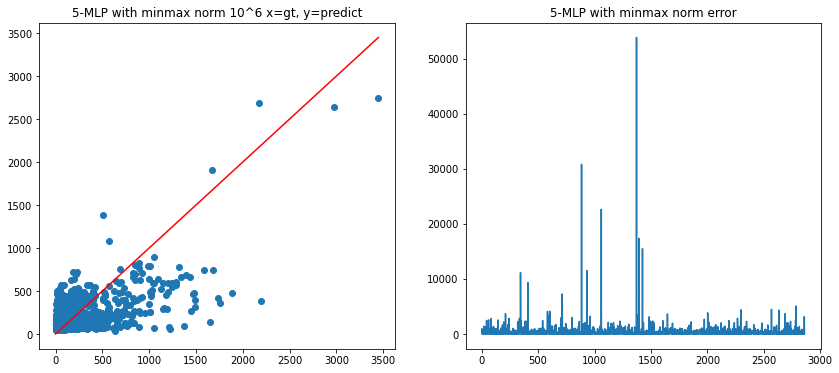

In [42]:
errs_5MLP_minmax = my_eval.eval_regression(y_test_minmax, model_5MLP_minmax.predict(x_test_minmax), scaler=scaler_minmax, 
                                           model_name='5-MLP with minmax norm', savepath=savepath)

------- evaluate 5-MLP with std norm -------
RMSE : 152817863.234493
R2 : 0.551659
----------------------------
[911508.87671058] 2862
평균 오차 318%
최대 오차 86096%
최소 오차 0%


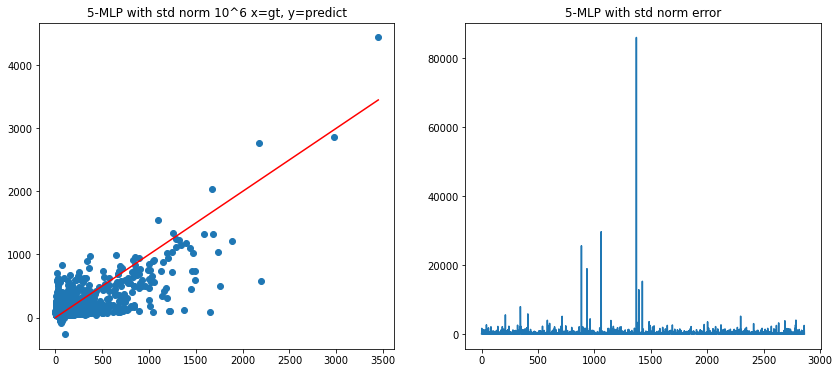

In [43]:
errs_5MLP_std = my_eval.eval_regression(y_test_std, model_5MLP_std.predict(x_test_std), scaler=scaler_std, 
                                        model_name='5-MLP with std norm', savepath=savepath)

------- evaluate 5-MLP with PCA -------
RMSE : 176183562.446930
R2 : 0.404076
----------------------------
[982264.59863763] 2862
평균 오차 343%
최대 오차 72901%
최소 오차 0%


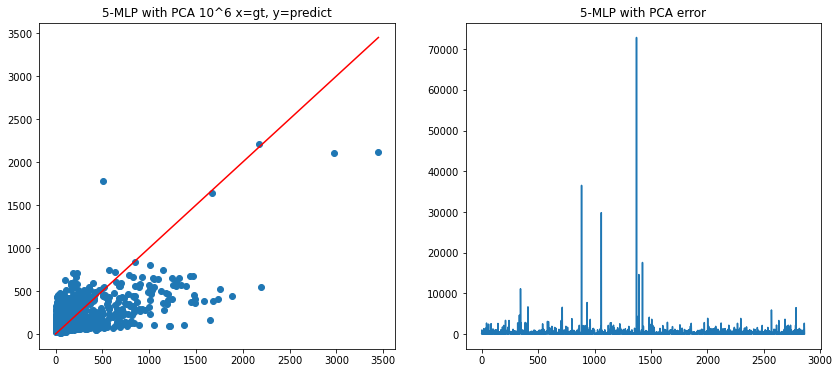

In [44]:
errs_5MLP_pca = my_eval.eval_regression(y_test_pca, model_5MLP_pca.predict(x_test_pca), scaler=scaler_pca, 
                                        model_name='5-MLP with PCA', savepath=savepath)

# Appendix - MLP training history

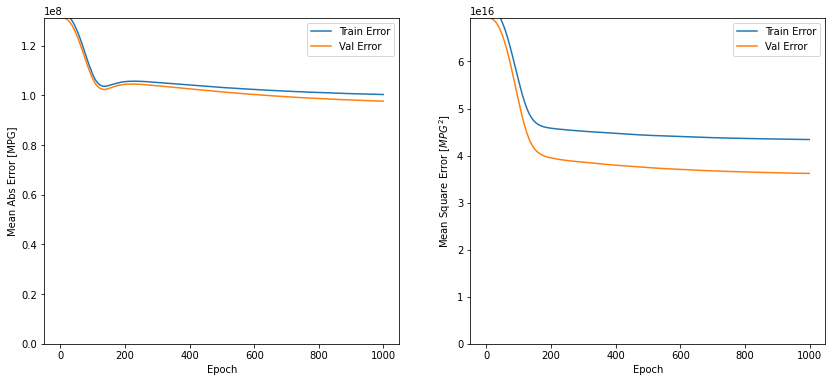

In [45]:
my_MLP.plot_history(hist_4MLP_raw)

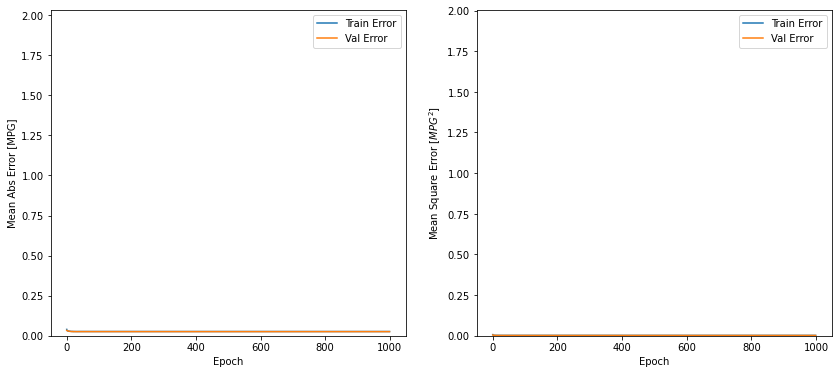

In [46]:
my_MLP.plot_history(hist_4MLP_minmax)

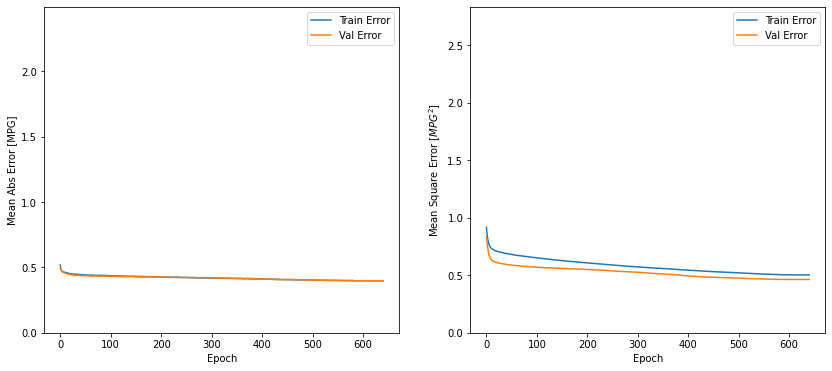

In [47]:
my_MLP.plot_history(hist_4MLP_std)

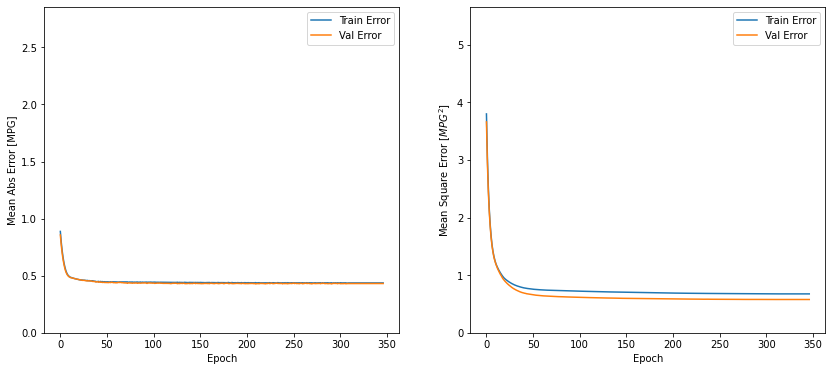

In [48]:
my_MLP.plot_history(hist_4MLP_pca)

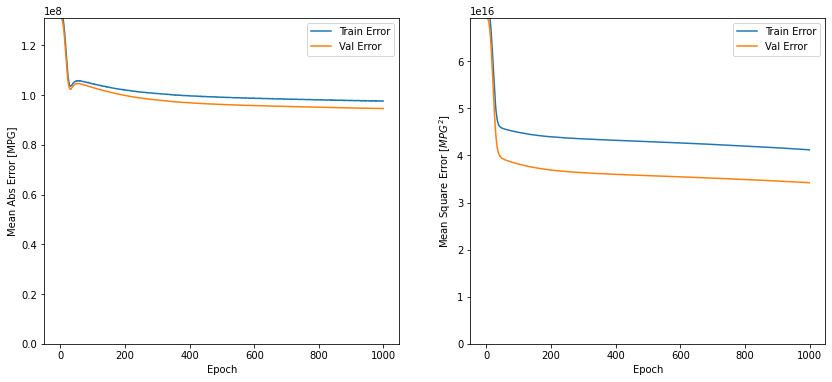

In [49]:
my_MLP.plot_history(hist_5MLP_raw)

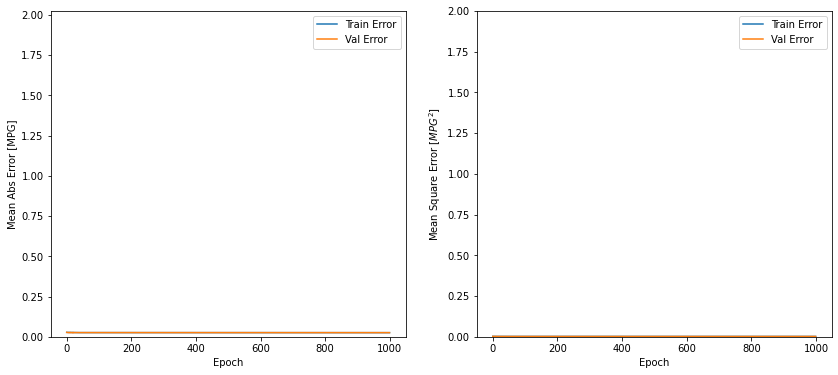

In [50]:
my_MLP.plot_history(hist_5MLP_minmax)

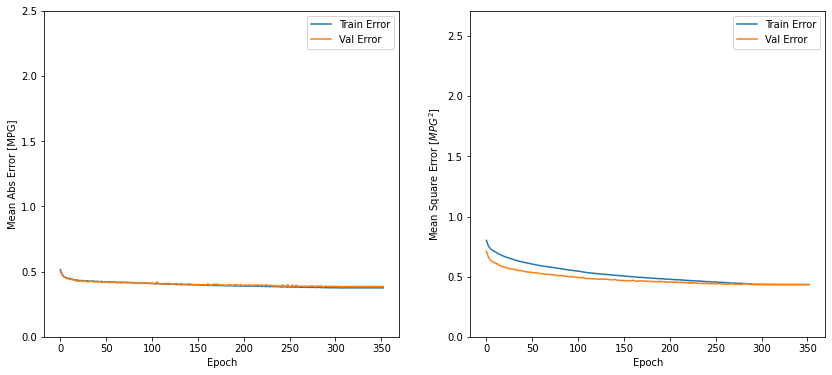

In [51]:
my_MLP.plot_history(hist_5MLP_std)

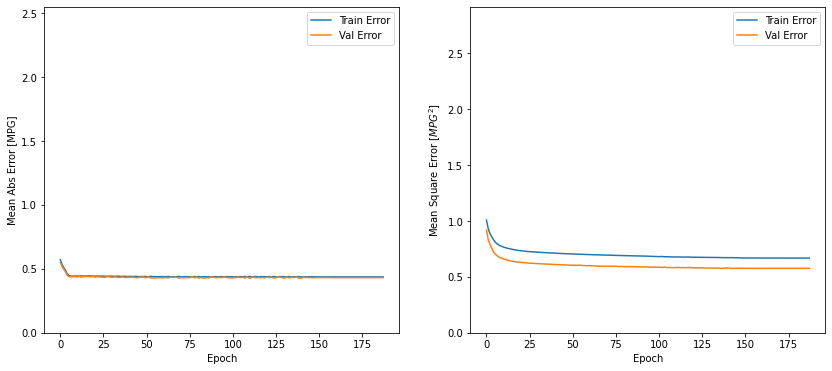

In [52]:
my_MLP.plot_history(hist_5MLP_pca)